In [7]:
import numpy as np
from sklearn import datasets
mnist = datasets.fetch_mldata('C:/Users/Owner/scikit_learn_data/mldata/MNIST original')
X,y = mnist.data,mnist.target
X = X/255.

print(X.shape) # (70000, 784)
print(y.shape) # (70000,)
print(y) # [ 0.  0.  0. ...,  9.  9.  9.]

(70000, 784)
(70000,)
[0. 0. 0. ... 9. 9. 9.]


<IPython.core.display.Javascript object>


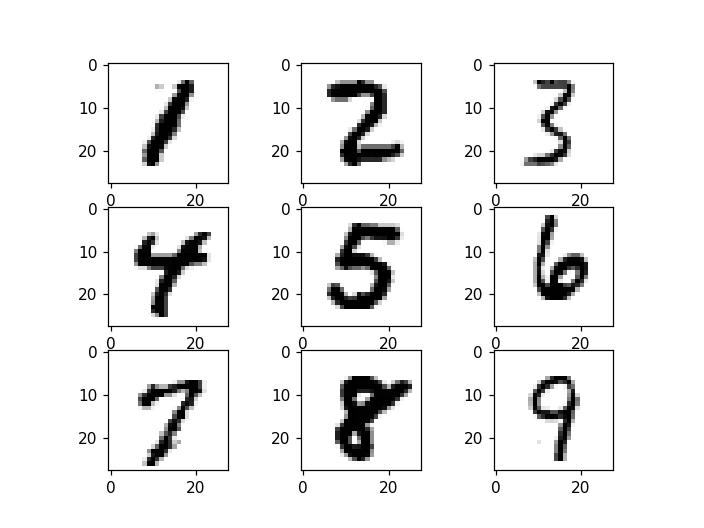

In [8]:
import matplotlib.pyplot as plt
% matplotlib notebook
for i in range(1,10):
    plt.subplot(330+i)
    plt.imshow(X[30+i*6500].reshape(28,28),cmap='gray_r')
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_kunren,X_kenshou,y_kunren,y_kenshou = train_test_split(X,y,test_size=0.2)

In [10]:
class Mikumikukaiki:
    def __init__(self,gakushuuritsu):
        self.gakushuuritsu = gakushuuritsu # 学習率

    def gakushuu(self,X,y,kurikaeshi,n_batch=0,X_kenshou=0,y_kenshou=0,patience=0):
        n = len(y) # データの数
        # もし検証データが渡されなければ、代わりに訓練データを検証データにも使う
        if(type(X_kenshou)!=np.ndarray):
            X_kenshou,y_kenshou = X,y
        # バッチの数が指定されていないか、データの数より多い場合、ミニバッチをしないことにする
        if(n_batch==0 or n<n_batch): 
            n_batch = n
        self.n_group = int(y.max()+1) # 種類の数
        y_1h = y[:,None]==range(self.n_group) # 正解ラベルの配列をone-hotにしておく
        self.w = np.zeros([X.shape[1]+1,self.n_group])
        # 毎回の損失と訓練データに対する正確度と検証データに対する正確度を記録するためのリスト
        self.sonshitsu = []
        self.kunren_seikaku = []
        self.kenshou_seikaku = []
        saikou = 0 # 今までの最高の正確度
        agaranai = 0 # 正確度が何回上がっていない
        for j in range(kurikaeshi):
            s = np.random.permutation(n)
            for i in range(0,n,n_batch):
                Xn = X[s[i:i+n_batch]]
                yn = y_1h[s[i:i+n_batch]]
                phi = self.softmax(Xn)
                eee = (yn-phi)/len(yn)*self.gakushuuritsu
                self.w[1:] += np.dot(eee.T,Xn).T
                self.w[0] += eee.sum(0)

            seigo = self.yosoku(X)==y
            kunren_seikaku = seigo.mean()*100 # 訓練データに対する正確度
            seigo = self.yosoku(X_kenshou)==y_kenshou
            kenshou_seikaku = seigo.mean()*100 # 検証データに対する正確度


            if(kenshou_seikaku > saikou):
                # 正確度が以前より高くなるとその値を取っておく
                saikou = kenshou_seikaku
                agaranai = 0
                w = self.w.copy()
            else:
                agaranai += 1 # 上がらなければ、カウント

            self.kunren_seikaku += [kunren_seikaku]
            self.kenshou_seikaku += [kenshou_seikaku]
            self.sonshitsu += [self.entropy(X,y_1h)]

            print(u'%d回目、正確度%.3f%%、最高%.3f%%'%(j+1,self.kenshou_seikaku[-1],saikou))

            if(patience!=0 and agaranai>=patience):
                break # 正確度が何回たっても上がらなければ学習が終わる

        self.w = w # 最後に取っておいた重みを採用する

    def yosoku(self,X):
        # 予測値を計算する
        return (np.dot(X,self.w[1:])+self.w[0]).argmax(1)

    def softmax(self,X):
        # ソフトマックス関数で確率を計算する
        h = np.dot(X,self.w[1:])+self.w[0]
        exp_h = np.exp(h.T-h.max(1))
        return (exp_h/exp_h.sum(0)).T

    def entropy(self,X,y_1h):
        # 交差エントロピーを計算する
        return -(y_1h*np.log(self.softmax(X)+1e-7)).mean()

1回目、正確度90.564%、最高90.564%
2回目、正確度91.321%、最高91.321%
3回目、正確度91.286%、最高91.321%
4回目、正確度91.564%、最高91.564%
5回目、正確度91.607%、最高91.607%
6回目、正確度91.736%、最高91.736%
7回目、正確度91.664%、最高91.736%
8回目、正確度91.864%、最高91.864%
9回目、正確度91.793%、最高91.864%
10回目、正確度92.000%、最高92.000%
11回目、正確度91.921%、最高92.000%
12回目、正確度92.043%、最高92.043%
13回目、正確度91.950%、最高92.043%
14回目、正確度91.971%、最高92.043%
15回目、正確度92.071%、最高92.071%
16回目、正確度92.050%、最高92.071%
17回目、正確度91.936%、最高92.071%
18回目、正確度92.021%、最高92.071%
19回目、正確度92.057%、最高92.071%
20回目、正確度91.921%、最高92.071%
21回目、正確度91.921%、最高92.071%
22回目、正確度92.079%、最高92.079%
23回目、正確度91.986%、最高92.079%
24回目、正確度92.193%、最高92.193%
25回目、正確度91.950%、最高92.193%
26回目、正確度92.043%、最高92.193%
27回目、正確度92.021%、最高92.193%
28回目、正確度91.971%、最高92.193%
29回目、正確度92.014%、最高92.193%
30回目、正確度92.093%、最高92.193%
31回目、正確度92.086%、最高92.193%
32回目、正確度91.657%、最高92.193%
33回目、正確度92.029%、最高92.193%
34回目、正確度92.036%、最高92.193%


<IPython.core.display.Javascript object>


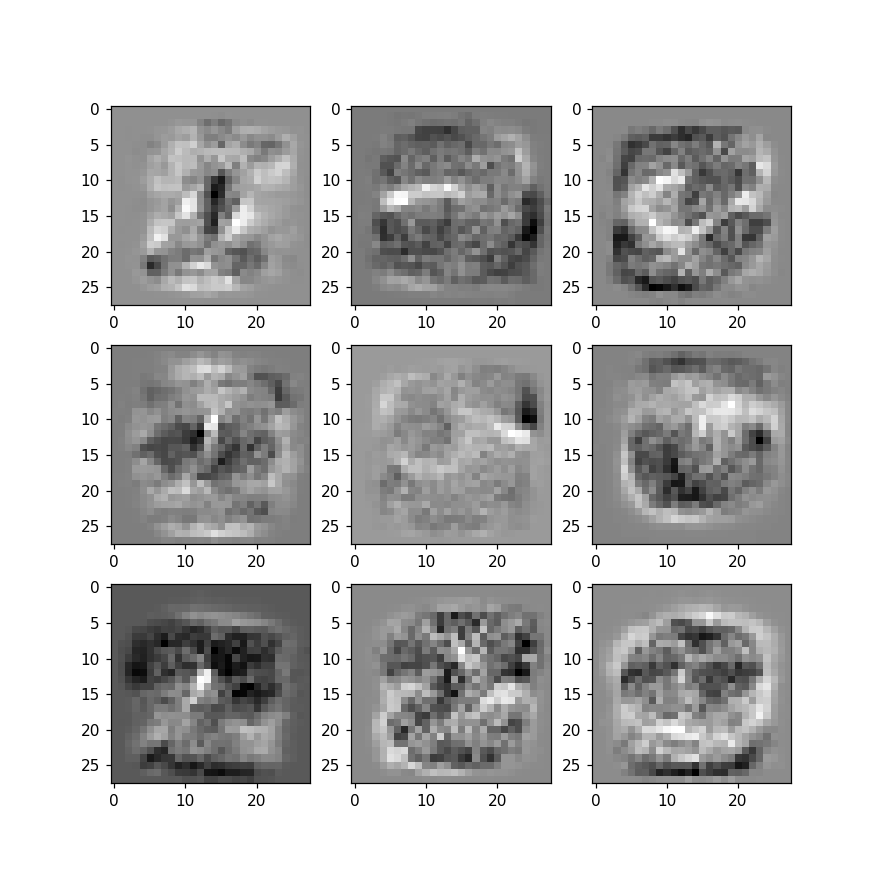

C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [13]:
gakushuuritsu = 0.24 # 学習率
kurikaeshi = 1000 # 学習が終わらない場合の繰り返す回数
n_batch = 100 # ミニバッチのサイズ
patience = 10 # 正確度が何回上がらなければ学習が終わる
mmk = Mikumikukaiki(gakushuuritsu)
mmk.gakushuu(X_kunren,y_kunren,kurikaeshi,n_batch,X_kenshou,y_kenshou,patience)

# 学習進歩のグラフを描く
plt.figure(figsize=[8,8])
ax = plt.subplot(211)
plt.plot(mmk.sonshitsu,'#000077')
plt.legend([u'損失'],prop={'family':'C:/Windows/Fonts/MSMHei-Bold.ttf','size':17})
plt.tick_params(labelbottom='off')
ax = plt.subplot(212)
ax.set_ylabel(u'正確度 (%)',fontname='C:/Windows/Fonts/MSMHei-Bold.ttf',size=18)
plt.plot(mmk.kunren_seikaku,'#dd0000')
plt.plot(mmk.kenshou_seikaku,'#00aa00')
plt.legend([u'訓練',u'檢證'],prop={'family':'C:/Windows/Fonts/MSMHei-Bold.ttf','size':17})
plt.show()

In [14]:
plt.imshow(mmk.w[1:,0].reshape(28,28),cmap='gray_r')
plt.show()

In [15]:
for i in range(1,10):
    plt.subplot(330+i)
    plt.imshow(mmk.w[1:,i].reshape(28,28),cmap='gray_r')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
t = mmk.yosoku(X_kenshou)
conma = confusion_matrix(y_kenshou,t)
for c in conma: print(c)

[1372    0    7    3    0    6   15    1    6    2]
[   0 1580    9    7    1   11    3    7   15    2]
[  15   10 1277   14   11   12   21   11   32    6]
[   4    6   38 1232    1   34    6   14   19   15]
[   6    6   11    0 1264    1   17    2    2   62]
[  26    6   20   47    8 1060   21    8   33   16]
[  12    0   12    0   13   16 1321    2   10    0]
[   7    2   13    8    7    1    1 1354    2   30]
[   5   22   18   41    4   46   14    6 1153   21]
[   5   10    3   11   31    6    0   49    9 1294]


<IPython.core.display.Javascript object>


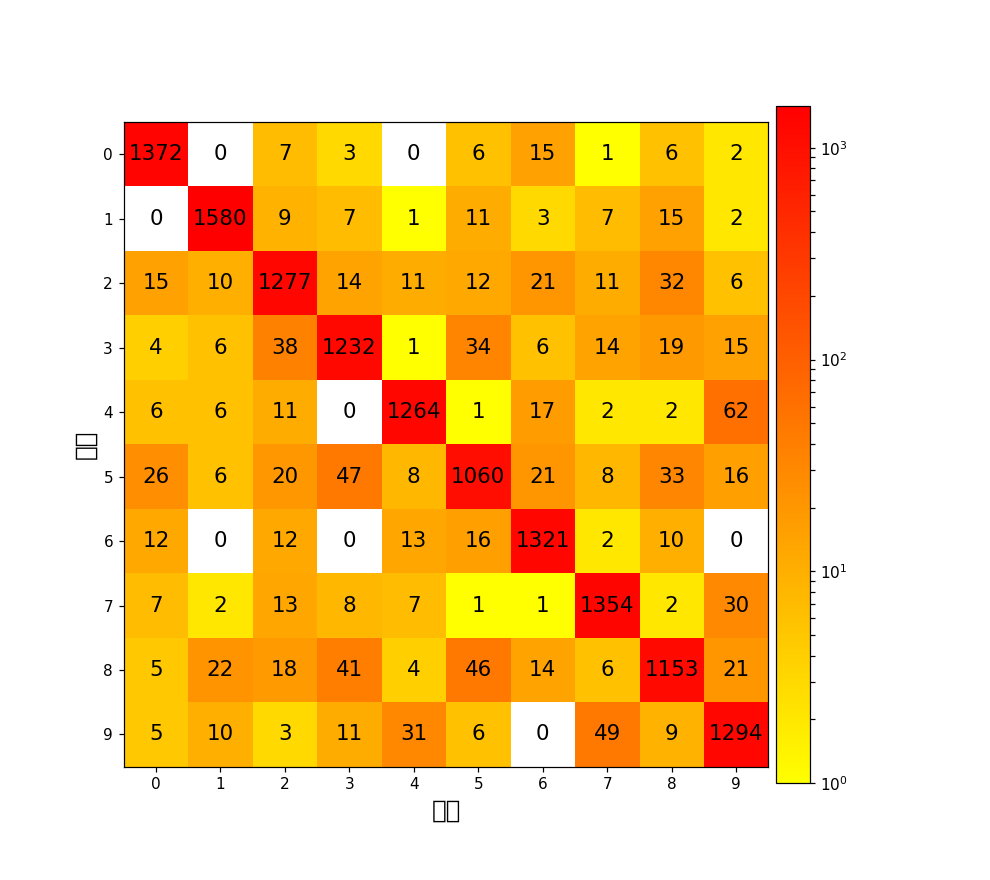

In [18]:
import matplotlib as mpl

def plotconma(conma,log=0):
    n = len(conma)
    plt.figure(figsize=[9,8])
    plt.gca(xticks=np.arange(n),xticklabels=np.arange(n),yticks=np.arange(n),yticklabels=np.arange(n))
    plt.xlabel(u'予測',fontname='Gothic',size=16)
    plt.ylabel(u'正解',fontname='Gothic',size=16)
    for i in range(n):
        for j in range(n):
            plt.text(j,i,conma[i,j],ha='center',va='center',size=14)
    if(log):
        plt.imshow(conma,cmap='autumn_r',norm=mpl.colors.LogNorm())
    else:
        plt.imshow(conma,cmap='autumn_r')
    plt.colorbar(pad=0.01)
    plt.show()

plotconma(conma,log=1)

1回目、正確度89.843%、最高89.843%
2回目、正確度90.714%、最高90.714%
3回目、正確度90.814%、最高90.814%
4回目、正確度91.179%、最高91.179%
5回目、正確度91.343%、最高91.343%
6回目、正確度91.329%、最高91.343%
7回目、正確度91.514%、最高91.514%
8回目、正確度91.457%、最高91.514%
9回目、正確度91.671%、最高91.671%
10回目、正確度91.564%、最高91.671%
11回目、正確度91.543%、最高91.671%
12回目、正確度91.743%、最高91.743%
13回目、正確度91.750%、最高91.750%
14回目、正確度91.914%、最高91.914%
15回目、正確度91.979%、最高91.979%
16回目、正確度91.950%、最高91.979%
17回目、正確度91.921%、最高91.979%
18回目、正確度92.007%、最高92.007%
19回目、正確度91.986%、最高92.007%
20回目、正確度92.043%、最高92.043%
21回目、正確度91.957%、最高92.043%
22回目、正確度92.193%、最高92.193%
23回目、正確度92.021%、最高92.193%
24回目、正確度91.900%、最高92.193%
25回目、正確度92.186%、最高92.193%
26回目、正確度92.157%、最高92.193%
27回目、正確度92.136%、最高92.193%
28回目、正確度92.043%、最高92.193%
29回目、正確度91.950%、最高92.193%
30回目、正確度91.950%、最高92.193%
1回目、正確度90.643%、最高90.643%
2回目、正確度91.571%、最高91.571%
3回目、正確度91.807%、最高91.807%
4回目、正確度91.871%、最高91.871%
5回目、正確度91.993%、最高91.993%
6回目、正確度92.250%、最高92.250%
7回目、正確度92.186%、最高92.250%
8回目、正確度92.336%、最高92.336%
9回目、正確度92.493%、最高92.493%
10回目

<IPython.core.display.Javascript object>


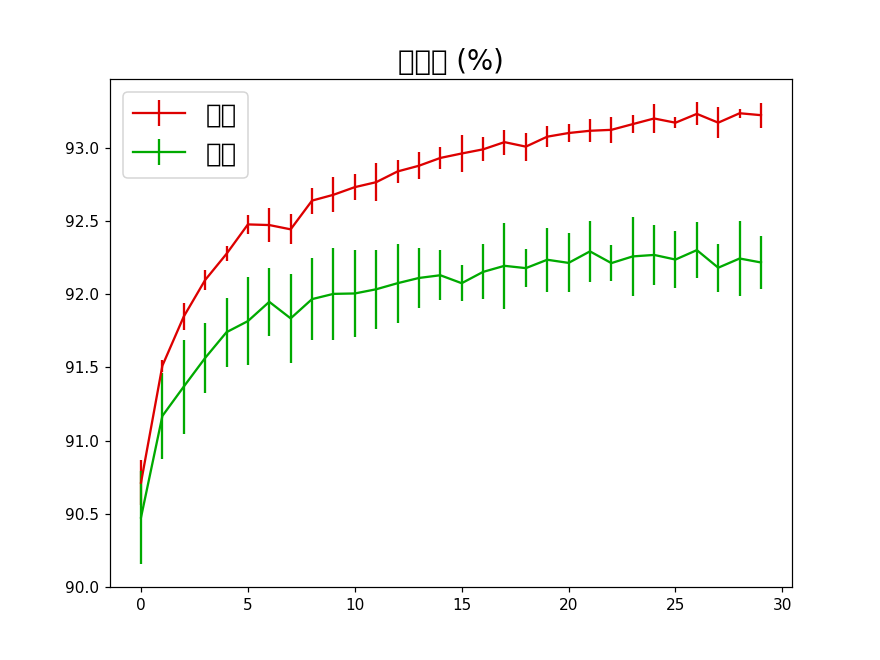

In [19]:
gakushuuritsu = 0.24 # 学習率
n_batch = 100 # ミニバッチのサイズ
n = len(y) # 全てのデータの数
nf = 5 # 何個にする
nn = int(n/nf)+(np.arange(nf)<(n%nf)) # 各グループのデータの数
kurikaeshi = 30 # 繰り返す回数（今回は早期終了はしない）
kunren_seikaku = []
kenshou_seikaku = []
s = np.random.permutation(n)
mmk = Mikumikukaiki(gakushuuritsu)
for i in range(nf):
    X_kunren = X[s[nn[i]:]]
    y_kunren = y[s[nn[i]:]]
    X_kenshou = X[s[:nn[i]]]
    y_kenshou = y[s[:nn[i]]]
    s = np.roll(s,nn[i],0) # 回すことでデータを分割するところは毎回変わる
    mmk.gakushuu(X_kunren,y_kunren,kurikaeshi,n_batch,X_kenshou,y_kenshou)
    kunren_seikaku.append(mmk.kunren_seikaku)
    kenshou_seikaku.append(mmk.kenshou_seikaku)
kunren_seikaku = np.stack(kunren_seikaku)
kenshou_seikaku = np.stack(kenshou_seikaku)

plt.figure(figsize=[8,6])
plt.errorbar(np.arange(kurikaeshi),kunren_seikaku.mean(0),yerr=kunren_seikaku.std(0),color='#dd0000')
plt.errorbar(np.arange(kurikaeshi),kenshou_seikaku.mean(0),yerr=kenshou_seikaku.std(0),color='#00aa00')
plt.title(u'正確度 (%)',fontname='AppleGothic',size=18)
plt.legend([u'訓練',u'檢證'],prop={'family':'AppleGothic','size':17})
plt.show()

In [20]:
s = np.random.permutation(len(y))
X = X[s[:7000]]
y = y[s[:7000]]

1回目、正確度86.214%、最高86.214%
2回目、正確度88.571%、最高88.571%
3回目、正確度88.929%、最高88.929%
4回目、正確度89.357%、最高89.357%
5回目、正確度89.929%、最高89.929%
6回目、正確度89.571%、最高89.929%
7回目、正確度90.143%、最高90.143%
8回目、正確度90.429%、最高90.429%
9回目、正確度90.500%、最高90.500%
10回目、正確度90.357%、最高90.500%
11回目、正確度90.643%、最高90.643%
12回目、正確度90.643%、最高90.643%
13回目、正確度90.929%、最高90.929%
14回目、正確度91.000%、最高91.000%
15回目、正確度90.714%、最高91.000%
16回目、正確度91.143%、最高91.143%
17回目、正確度90.286%、最高91.143%
18回目、正確度90.786%、最高91.143%
19回目、正確度91.214%、最高91.214%
20回目、正確度91.071%、最高91.214%
21回目、正確度91.143%、最高91.214%
22回目、正確度91.071%、最高91.214%
23回目、正確度90.857%、最高91.214%
24回目、正確度90.643%、最高91.214%
25回目、正確度90.643%、最高91.214%
26回目、正確度91.143%、最高91.214%
27回目、正確度90.857%、最高91.214%
28回目、正確度91.286%、最高91.286%
29回目、正確度90.857%、最高91.286%
30回目、正確度90.643%、最高91.286%
1回目、正確度87.071%、最高87.071%
2回目、正確度88.429%、最高88.429%
3回目、正確度88.500%、最高88.500%
4回目、正確度89.357%、最高89.357%
5回目、正確度90.214%、最高90.214%
6回目、正確度90.429%、最高90.429%
7回目、正確度90.429%、最高90.429%
8回目、正確度90.357%、最高90.429%
9回目、正確度89.929%、最高90.429%
10回目

<IPython.core.display.Javascript object>


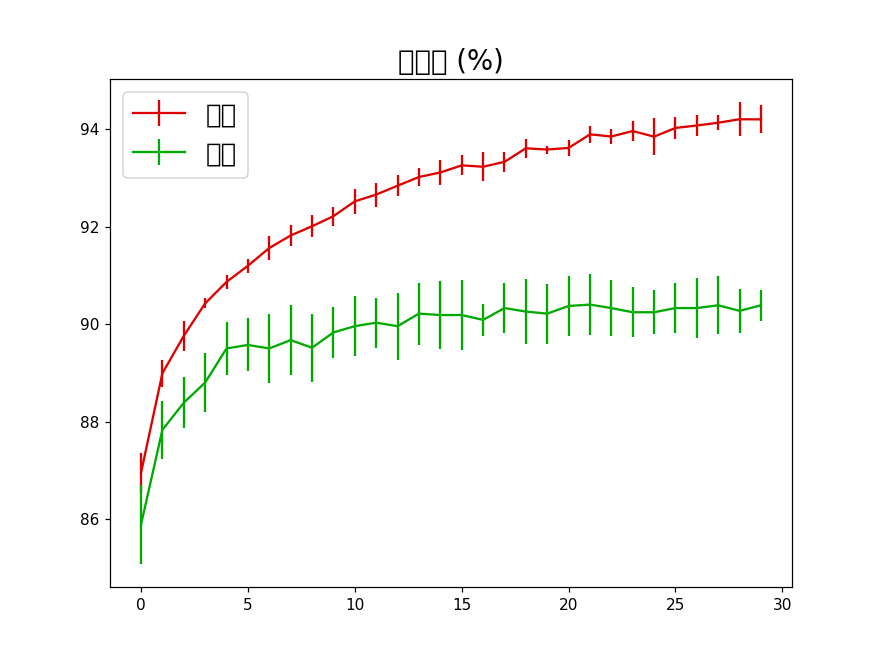

In [21]:
gakushuuritsu = 0.24 # 学習率
n_batch = 100 # ミニバッチのサイズ
n = len(y) # 全てのデータの数
nf = 5 # 何個にする
nn = int(n/nf)+(np.arange(nf)<(n%nf)) # 各グループのデータの数
kurikaeshi = 30 # 繰り返す回数（今回は早期終了はしない）
kunren_seikaku = []
kenshou_seikaku = []
s = np.random.permutation(n)
mmk = Mikumikukaiki(gakushuuritsu)
for i in range(nf):
    X_kunren = X[s[nn[i]:]]
    y_kunren = y[s[nn[i]:]]
    X_kenshou = X[s[:nn[i]]]
    y_kenshou = y[s[:nn[i]]]
    s = np.roll(s,nn[i],0) # 回すことでデータを分割するところは毎回変わる
    mmk.gakushuu(X_kunren,y_kunren,kurikaeshi,n_batch,X_kenshou,y_kenshou)
    kunren_seikaku.append(mmk.kunren_seikaku)
    kenshou_seikaku.append(mmk.kenshou_seikaku)
kunren_seikaku = np.stack(kunren_seikaku)
kenshou_seikaku = np.stack(kenshou_seikaku)

plt.figure(figsize=[8,6])
plt.errorbar(np.arange(kurikaeshi),kunren_seikaku.mean(0),yerr=kunren_seikaku.std(0),color='#dd0000')
plt.errorbar(np.arange(kurikaeshi),kenshou_seikaku.mean(0),yerr=kenshou_seikaku.std(0),color='#00aa00')
plt.title(u'正確度 (%)',fontname='AppleGothic',size=18)
plt.legend([u'訓練',u'檢證'],prop={'family':'AppleGothic','size':17})
plt.show()

In [22]:
s = np.random.permutation(len(y))
X = X[s[:700]]
y = y[s[:700]]

1回目、正確度65.000%、最高65.000%
2回目、正確度73.571%、最高73.571%
3回目、正確度77.857%、最高77.857%
4回目、正確度78.571%、最高78.571%
5回目、正確度79.286%、最高79.286%
6回目、正確度75.714%、最高79.286%
7回目、正確度77.143%、最高79.286%
8回目、正確度79.286%、最高79.286%
9回目、正確度78.571%、最高79.286%
10回目、正確度78.571%、最高79.286%
11回目、正確度79.286%、最高79.286%
12回目、正確度80.000%、最高80.000%
13回目、正確度80.714%、最高80.714%
14回目、正確度79.286%、最高80.714%
15回目、正確度80.000%、最高80.714%
16回目、正確度79.286%、最高80.714%
17回目、正確度80.714%、最高80.714%
18回目、正確度80.714%、最高80.714%
19回目、正確度80.714%、最高80.714%
20回目、正確度76.429%、最高80.714%
21回目、正確度82.143%、最高82.143%
22回目、正確度82.857%、最高82.857%
23回目、正確度82.143%、最高82.857%
24回目、正確度81.429%、最高82.857%
25回目、正確度84.286%、最高84.286%
26回目、正確度81.429%、最高84.286%
27回目、正確度81.429%、最高84.286%
28回目、正確度81.429%、最高84.286%
29回目、正確度80.714%、最高84.286%
30回目、正確度82.143%、最高84.286%
1回目、正確度68.571%、最高68.571%
2回目、正確度76.429%、最高76.429%
3回目、正確度77.143%、最高77.143%
4回目、正確度75.714%、最高77.143%
5回目、正確度80.714%、最高80.714%
6回目、正確度82.857%、最高82.857%
7回目、正確度78.571%、最高82.857%
8回目、正確度82.857%、最高82.857%
9回目、正確度82.143%、最高82.857%
10回目

<IPython.core.display.Javascript object>


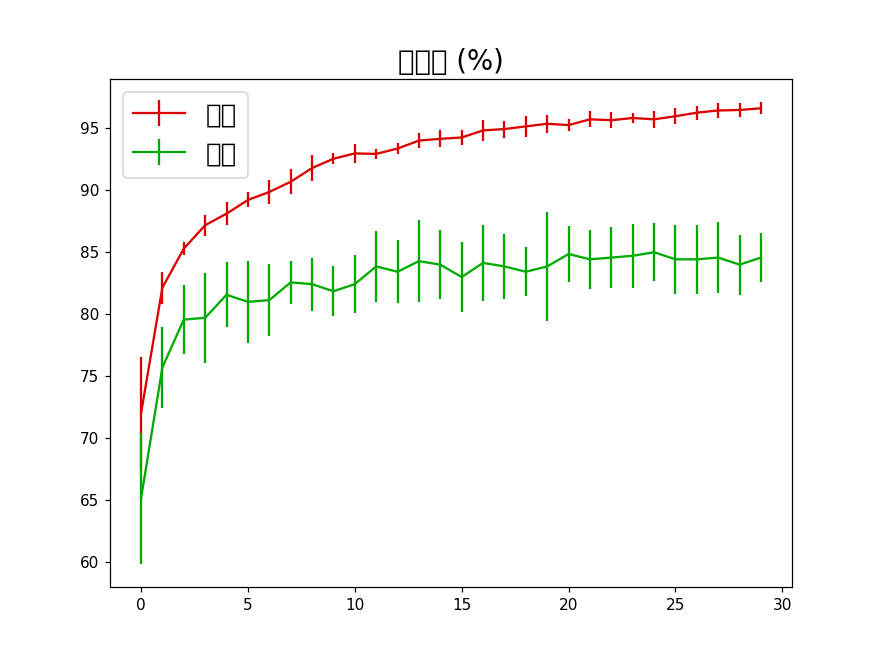

In [24]:
gakushuuritsu = 0.24 # 学習率
n_batch = 100 # ミニバッチのサイズ
n = len(y) # 全てのデータの数
nf = 5 # 何個にする
nn = int(n/nf)+(np.arange(nf)<(n%nf)) # 各グループのデータの数
kurikaeshi = 30 # 繰り返す回数（今回は早期終了はしない）
kunren_seikaku = []
kenshou_seikaku = []
s = np.random.permutation(n)
mmk = Mikumikukaiki(gakushuuritsu)
for i in range(nf):
    X_kunren = X[s[nn[i]:]]
    y_kunren = y[s[nn[i]:]]
    X_kenshou = X[s[:nn[i]]]
    y_kenshou = y[s[:nn[i]]]
    s = np.roll(s,nn[i],0) # 回すことでデータを分割するところは毎回変わる
    mmk.gakushuu(X_kunren,y_kunren,kurikaeshi,n_batch,X_kenshou,y_kenshou)
    kunren_seikaku.append(mmk.kunren_seikaku)
    kenshou_seikaku.append(mmk.kenshou_seikaku)
kunren_seikaku = np.stack(kunren_seikaku)
kenshou_seikaku = np.stack(kenshou_seikaku)

plt.figure(figsize=[8,6])
plt.errorbar(np.arange(kurikaeshi),kunren_seikaku.mean(0),yerr=kunren_seikaku.std(0),color='#dd0000')
plt.errorbar(np.arange(kurikaeshi),kenshou_seikaku.mean(0),yerr=kenshou_seikaku.std(0),color='#00aa00')
plt.title(u'正確度 (%)',fontname='AppleGothic',size=18)
plt.legend([u'訓練',u'檢證'],prop={'family':'AppleGothic','size':17})
plt.show()